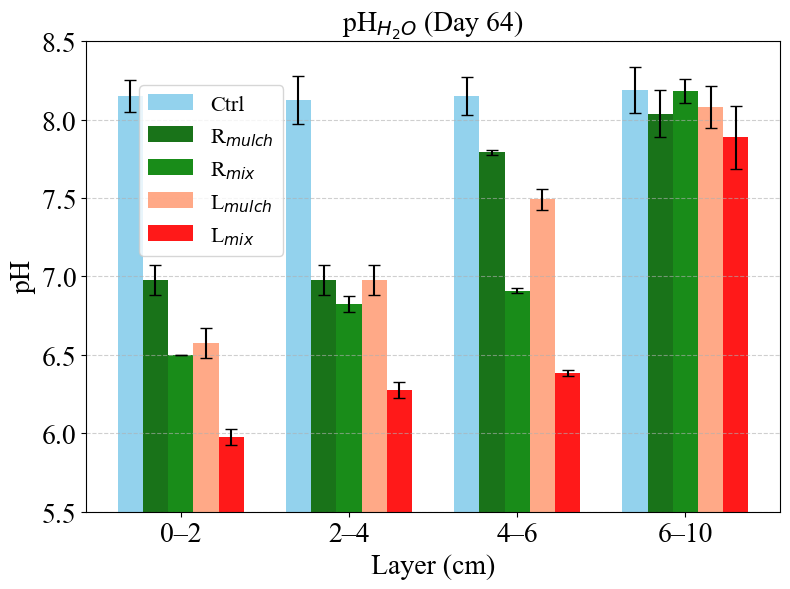

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = r"C:\pH_measured64.xlsx"
df = pd.read_excel(file_path)

# Set labels
custom_labels = ["0–2", "2–4", "4–6", "6–10"]
x_indexes = np.arange(len(custom_labels))  

# Treatment setup
treatment_labels = ["Control", "Root Mulched", "Root Mixed", "Leaf Mulched", "Leaf Mixed"]
legend_labels = ["Ctrl", "R$_{mulch}$", "R$_{mix}$", "L$_{mulch}$", "L$_{mix}$"]
colors = ['skyblue', 'darkgreen', 'green', 'lightsalmon', 'red']  # Harmonized colors
num_replicates = 4

# Compute means and stds 
treatment_means = []
treatment_stds = []
for treatment in treatment_labels:
    rep_columns = [f"{treatment} measured Rep {i+1} pH" for i in range(num_replicates)]
    treatment_means.append(df[rep_columns].iloc[:4].mean(axis=1))
    treatment_stds.append(df[rep_columns].iloc[:4].std(axis=1))

# Plotting
bar_width = 0.15
fig, ax = plt.subplots(figsize=(8, 6))

for i, (mean, std, label, color) in enumerate(zip(treatment_means, treatment_stds, legend_labels, colors)):
    ax.bar(x_indexes + i * bar_width, mean, yerr=std,
           width=bar_width, color=color, label=label, capsize=4, alpha=0.9)

# Set custom tick positions and labels
tick_positions = x_indexes + bar_width * (len(treatment_labels) / 2 - 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(custom_labels, fontsize=16, fontname="Times New Roman")

# Labels, title, legend, and formatting
ax.set_xlabel("Layer (cm)", fontsize=20, fontname="Times New Roman")
ax.set_ylabel("pH", fontsize=20, fontname="Times New Roman")
ax.set_title("pH$_{H_2O}$ (Day 64)", fontsize=20, fontname="Times New Roman")


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname("Times New Roman")
    label.set_fontsize(16)

legend = ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(0.3, 0.93), frameon=True)

legend.get_title().set_fontname("Times New Roman")
legend.get_title().set_fontsize(14)
for text in legend.get_texts():
    text.set_fontname("Times New Roman")
# Y-ticks formatting in Times New Roman size 16
# Y-ticks formatting in Times New Roman size 16
ax.tick_params(axis='y', labelsize=20, labelrotation=0, labelcolor='black', labelfontfamily="Times New Roman")
ax.tick_params(axis='x', labelsize=20, labelrotation=0, labelcolor='black', labelfontfamily="Times New Roman")
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_ylim(5.5, 8.5)

plt.tight_layout()
plt.show()
